<a href="https://colab.research.google.com/github/Abisolag/School-Drop_out_prediction/blob/main/Task_1_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Dropout Prediction

Introduction
Students facing the risk of dropping out of educational institutions require targeted support to improve their chances of success. To address this need, educational institutions require accurate predictive models that can effectively identify students at risk. This project is dedicated to developing and optimizing such predictive models, aiming to accurately forecast student dropout rates. Hence, it seeks to provide actionable recommendations for interventions that can boost student retention and overall success. The ultimate objective is to create a comprehensive framework that enhances institutional strategies for supporting at-risk students and improving educational outcomes.

Data Overview
The dataset under review comprises 4,424 rows and 37 columns, offering a comprehensive look into student characteristics, academic performance, and external economic factors. Key features include demographics such as marital status, nationality, and gender, along with parental qualifications and occupations. Academic data is well-documented, with columns detailing previous qualifications, admission grades, and performance across two semesters. Financial aspects are captured through columns like tuition status and scholarship holdings. The dataset also includes macroeconomic indicators such as unemployment rates, inflation rates, and GDP, providing context for external influences on student outcomes.

Importantly, the target variable indicates whether a student has graduated, still enrolled or dropped out, which is the primary outcome of interest.

The dataset used for this report can be access from: https://drive.google.com/file/d/1ROnFzGyJxHX1r4A0K1o2jsp_ORGUiC0b/view?usp=sharing


# METHDOLOGY

Install Libaries
All necessary libaries to be used for this report were install using "pip install (such libaries), which were then imported into the code editor

Data Preprocessing
Effective data cleaning is crucial to maintaining accuracy and consistency in datasets, ensuring reliable analysis. In this case, the cleaning process involved removing semicolons from improperly formatted fields using a split operation, restoring the correct data structure. Additionally, data transformation was done in which columns with numeric values stored as strings were converted into appropriate data types, such as integers and floats, to enable accurate calculations and statistical analysis. These transformations improved the dataset's overall quality, making it ready for in-depth analysis of factors influencing student graduation rates and minimizing potential errors in insights.

Statistical Analysis
The analysis conducted focused on skewness, correlation, and hypothesis testing. Skewness was assessed to evaluate the distribution of the data, identifying any asymmetry or bias. A correlation analysis was performed to determine the strength and direction of relationships between key variables, identifying those most related to the target outcome. Hypothesis testing was carried out to confirm whether observed trends were statistically significant or due to random variation. These analyses provide essential insights into the dataset, aiding in accurate decision-making and guiding further modeling efforts.

Model Creation
A thorough evaluation of multiple machine learning models was conducted to identify the most effective model for predicting the target outcome. The following models were tested:

Random Forest: This ensemble method provided strong predictive performance, showing high accuracy by leveraging multiple decision trees.
Logistic Regression: The model performed well in linear relationships, providing reasonable accuracy for binary classification.
Support Vector Machine (SVM): SVM delivered good accuracy by maximizing the margin between classes, particularly with well-separated data points.
K-Nearest Neighbors (KNN): KNN's accuracy was evaluated based on its ability to classify by proximity to similar data points, yielding moderate results.
Gradient Boosting: This boosting algorithm performed with high accuracy by improving weak learners iteratively.
Decision Tree: While effective at handling non-linear data, the Decision Tree model showed relatively lower accuracy due to potential overfitting.
Each model was evaluated based on its accuracy score, with Random Forest and Gradient Boosting emerging as top performers. These results will guide the selection of the most suitable model for further analysis and deployment.



In [5]:
#import all libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
#load the dataset, ensuring it has no column
data=pd.read_csv("data.csv", header=None)
data

,0
0,Marital status;Application mode;Application or...
1,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
2,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
3,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
4,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
...,...
4420,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4421,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4422,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4423,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


In [17]:
#Extract the first row, which contains the clustered column header
header_row = data.iloc[0, 0]
header_row

'Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother\'s qualification;Father\'s qualification;Mother\'s occupation;Father\'s occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'

In [18]:
#Split the single column into multiple columns using semicolon delimiter
data_split = data[0].str.split(';', expand=True)
data_split

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Marital status,Application mode,Application order,Course,"""Daytime/evening attendance\t""",Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
3,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
4,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666666666666666,0,15.5,2.8,-4.06,Graduate
4421,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.0,0,11.1,0.6,2.02,Dropout
4422,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
4423,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate


In [19]:
#Using Split,seperate the clustered header column string into individual column names based on semicolons
cleaned_columns = header_row.split(';')
cleaned_columns = [col.replace('"', '').replace('\t', '').strip()
                   for col in cleaned_columns]


cleaned_columns

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rat

In [20]:
#Assign the cleaned column names and drop the first row since it was used for column headers
data_split.columns = cleaned_columns
data_split = data_split.drop(0)


In [21]:
data_split

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
3,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
4,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
5,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666666666666666,0,15.5,2.8,-4.06,Graduate
4421,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.0,0,11.1,0.6,2.02,Dropout
4422,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.5,0,13.9,-0.3,0.79,Dropout
4423,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.0,0,9.4,-0.8,-3.12,Graduate


In [22]:
data_split.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.0,0,10.8,1.4,1.74,Dropout
2,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666666666666666,0,13.9,-0.3,0.79,Graduate
3,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.0,0,10.8,1.4,1.74,Dropout
4,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.4,0,9.4,-0.8,-3.12,Graduate
5,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.0,0,13.9,-0.3,0.79,Graduate


In [23]:
data_split.shape

(4424, 37)

In [24]:
data_split.dtypes

,0
Marital status,object
Application mode,object
Application order,object
Course,object
Daytime/evening attendance,object
Previous qualification,object
Previous qualification (grade),object
Nacionality,object
Mother's qualification,object
Father's qualification,object


In [25]:
#To view the dtype of each column
pd.set_option('display.max_columns', None)

# View the DataFrame (first few rows)
print(data_split.head())

  Marital status Application mode Application order Course  \
1              1               17                 5    171   
2              1               15                 1   9254   
3              1                1                 5   9070   
4              1               17                 2   9773   
5              2               39                 1   8014   

  Daytime/evening attendance Previous qualification  \
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          1                      1   
5                          0                      1   

  Previous qualification (grade) Nacionality Mother's qualification  \
1                          122.0           1                     19   
2                          160.0           1                      1   
3                          122.0           1                     37   
4           

In [26]:
# Convert the selected columns to integer (Int64 type allows for NaN values)
columns_to_convert=['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance',
  'Previous qualification',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)']
data_split[columns_to_convert] = data_split[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
data_split.dtypes

,0
Marital status,Int64
Application mode,Int64
Application order,Int64
Course,Int64
Daytime/evening attendance,Int64
Previous qualification,Int64
Previous qualification (grade),object
Nacionality,Int64
Mother's qualification,Int64
Father's qualification,Int64


In [27]:
# Convert the selected columns to float
columns_to_float=['Previous qualification (grade)', 'Admission grade',
                 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)',
                  'Unemployment rate','Inflation rate', 'GDP']
data_split[columns_to_float] = data_split[columns_to_float].apply(pd.to_numeric, errors='coerce')

# Display the data types to confirm the changes
data_split.dtypes

,0
Marital status,Int64
Application mode,Int64
Application order,Int64
Course,Int64
Daytime/evening attendance,Int64
Previous qualification,Int64
Previous qualification (grade),float64
Nacionality,Int64
Mother's qualification,Int64
Father's qualification,Int64


In [28]:
data_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 1 to 4424
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   Int64  
 1   Application mode                                4424 non-null   Int64  
 2   Application order                               4424 non-null   Int64  
 3   Course                                          4424 non-null   Int64  
 4   Daytime/evening attendance                      4424 non-null   Int64  
 5   Previous qualification                          4424 non-null   Int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   Int64  
 8   Mother's qualification                          4424 non-null   Int64  
 9   Father's qualification                   

In [29]:
data_split.describe

<bound method NDFrame.describe of       Marital status  Application mode  Application order  Course  \
1                  1                17                  5     171   
2                  1                15                  1    9254   
3                  1                 1                  5    9070   
4                  1                17                  2    9773   
5                  2                39                  1    8014   
...              ...               ...                ...     ...   
4420               1                 1                  6    9773   
4421               1                 1                  2    9773   
4422               1                 1                  1    9500   
4423               1                 1                  1    9147   
4424               1                10                  1    9773   

      Daytime/evening attendance  Previous qualification  \
1                              1                       1   
2                              1                       1   
3                              1                       1   
4                              1                       1   
5                              0                       1   
...                          ...                     ...   
4420                           1                       1   
4421                           1                       1   
4422                           1                       1   
4423                           1                       1   
4424                           1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
1                              122.0            1                      19   
2                              160.0            1                       1   
3                              122.0            1                      37   
4                              122.0            1                      38   
5                              100.0            1                      37   
...                              ...          ...                     ...   
4420                           125.0            1                       1   
4421                           120.0          105                       1   
4422                           154.0            1                      37   
4423                           180.0            1                      37   
4424                           152.0           22                      38   

      Father's qualification  Mother's occupation  Father's occupation  \
1                         12                    5                    9   
2                          3                    3                    3   
3                         37                    9                    9   
4                         37                    5                    3   
5                         38                    9                    9   
...                      ...                  ...                  ...   
4420                       1                    5                    4   
4421                       1                    9                    9   
4422                      37                    9                    9   
4423                      37                    7                    4   
4424                      37                    5                    9   

      Admission grade  Displaced  Educational special needs  Debtor  \
1               127.3          1                          0       0   
2               142.5          1                          0       0   
3               124.8          1                          0       0   
4               119.6          1                          0       0   
5               141.5          0                          0       0   
...               ...        ...                        ...     ...   
4420            122.2          0                          0       0   
4421            119.0          1  

In [30]:
ddd=data_split.drop(columns=['Target'])
ddd

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
2,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
3,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
4,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
5,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4421,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4422,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4423,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [31]:
#Calculate the correlation matrix
correlation_matrix = ddd.corr()
correlation_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,0.034994,0.031609,-0.004771,-0.234886,-0.028343,0.034304,-0.087158,-0.014738,-0.053765,0.522717,-0.027905,0.061209,0.052107,0.058030,-0.031027,-0.059811,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,0.051600,0.036707,-0.013271,-0.301197,-0.030779,0.122818,-0.136262,0.160130,-0.163117,0.516243,0.003438,0.247426,0.164299,0.225938,-0.029055,-0.117741,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,-0.039039,-0.030014,-0.096930,0.332362,0.025597,-0.072151,0.055891,-0.089559,0.073709,-0.271154,-0.028801,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,0.031265,0.028881,-0.125058,-0.087399,-0.018795,-0.032673,0.018381,-0.099571,0.017138,0.042994,-0.026737,-0.096335,0.328461,0.272845,0.180500,0.389349,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,-0.019067,-0.015477,0.007970,0.251767,0.031017,0.006658,0.038799,-0.012326,0.093912,-0.462280,0.027973,-0.127466,-0.043056,-0.045889,0.016935,0.063974,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,0.014822,0.016263,0.184183,-0.115188,-0.010461,0.095104,-0.068453,0.078684,-0.070513,0.156234,-0.026226,0.166025,0.078702,0.130597,0.022020,-0.000497,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,-0.011415,-0.019284,0.580444,-0.011001,-0.001458,-0.037507,0.060578,-0.047874,0.055965,-0.111377,0.048529,-0.008872,-0.029169,-0.070702,0.048410,0.059438,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,0.043187,0.020626,0.028176,-0.007448,-0.005982,0.051989,-0.026115,-0.023258,-0.010490,-0.003647,0.790935,-0.000370,-0.013292,-0.007763,-0.002268,0.000869,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,0.076772,0.052329,-0.054412,-0.081176,-0.021534,0.018774,-0.025665,-0.058753,0.045951,0.294614,-0.038504,0.046855,0.053664,0.045

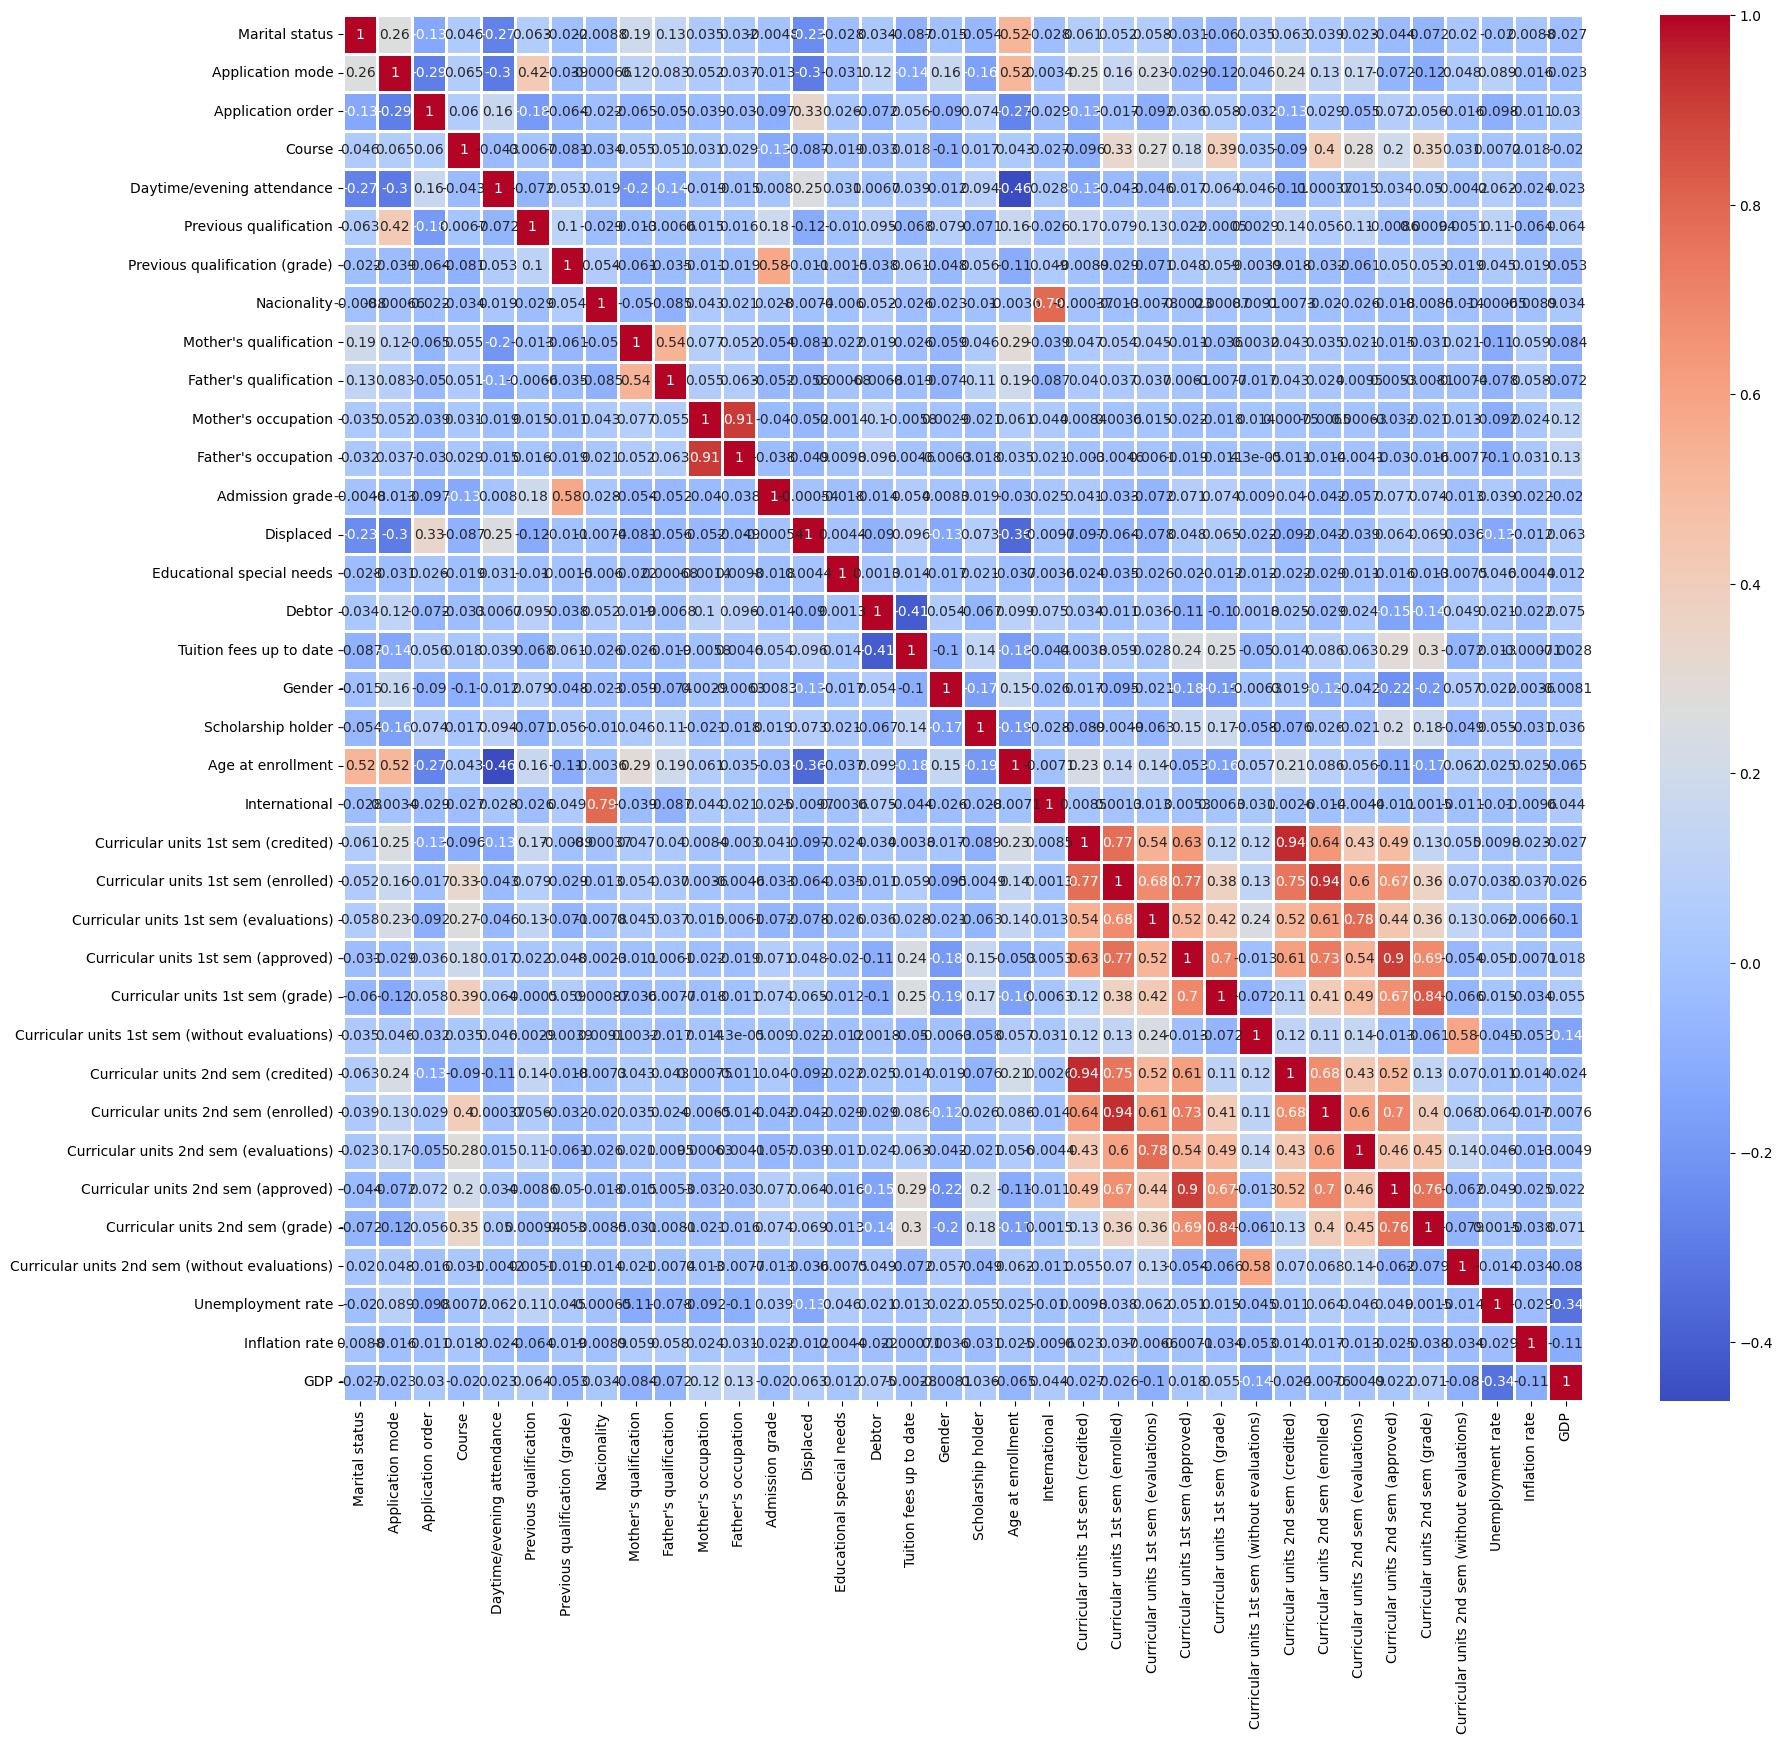

In [32]:
#visualization of correlation using heatmap
plt.figure(figsize=(20, 18))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=1.0)

#Show the plot
plt.show()

In [33]:
#Identifies data is normally distributed and outliers.

skewness = ddd.skew()
kurtosis = ddd.kurtosis()
print('Skewness:\n', skewness)
print('Kurtosis:\n', kurtosis)

Skewness:
 Marital status                                     4.399764
Application mode                                   0.393036
Application order                                   1.88105
Course                                            -3.809135
Daytime/evening attendance                        -2.507238
Previous qualification                             2.871207
Previous qualification (grade)                     0.312867
Nacionality                                       10.703998
Mother's qualification                             0.001978
Father's qualification                            -0.298697
Mother's occupation                                5.339227
Father's occupation                                5.395173
Admission grade                                      0.5306
Displaced                                         -0.194468
Educational special needs                          9.154976
Debtor                                             2.434652
Tuition fees up to date      

In [34]:
#extracting the cleaned dataset
file_path ='cleaned_data.csv'

# Convert and store DataFrame as CSV
data_split.to_csv(file_path, index=False)

print(f"Data has been successfully saved to {file_path}")

Data has been successfully saved to cleaned_data.csv


Hypothesis Analysis
The hypothesis analysis was conducted to determine whether observed patterns in the dataset were statistically significant. A p-value threshold of 0.05 was used as the benchmark for significance. A low p-value (p < 0.05) indicates that there is a statistically significant difference between variables, meaning the observed effects are unlikely due to random chance. If the p-value is high (p > 0.05), it suggests no significant difference, and any patterns could be attributed to randomness.

In [35]:
#Defining hypothesis using ANOVA

import scipy.stats as stats
#Hypothesis 1: Higher Socio-Economic Status Correlates with Lower Dropout Rates
# Using the economic status which includes GDP, inflation, unemployment of students in each group (Dropout, Enrolled, Graduate).

# Subset the data based on target (Dropout, Enrolled, Graduate)
dropout = data_split[data_split['Target'] == 'Dropout']
graduate = data_split[data_split['Target'] == 'Graduate']
enrolled = data_split[data_split['Target'] == 'Enrolled']

# Perform ANOVA for GDP
f_val, p_val = stats.f_oneway(dropout['GDP'], graduate['GDP'], enrolled['GDP'])
print(f"ANOVA for GDP: F-value = {f_val}, p-value = {p_val}")

ANOVA for GDP: F-value = 4.799008995763781, p-value = 0.008280870491705995


In [36]:
# Perform ANOVA for Inflation
f_val, p_val = stats.f_oneway(dropout['Inflation rate'], graduate['Inflation rate'], enrolled['Inflation rate'])
print(f"ANOVA for Inflation rate : F-value = {f_val}, p-value = {p_val}")

ANOVA for Inflation rate : F-value = 1.7419897938269673, p-value = 0.17529171243976469


In [38]:
# Perform ANOVA for Unemployment
f_val, p_val = stats.f_oneway(dropout['Unemployment rate'], graduate['Unemployment rate'], enrolled['Unemployment rate'])
print(f"ANOVA for Unemployment Rate: F-value = {f_val}, p-value = {p_val}")

ANOVA for Unemployment Rate: F-value = 5.922513341612643, p-value = 0.002699757038015915


In [39]:
#Hypothesis 2: Parental Education Levels Correlate with Dropout Rates
# using social status which includes education levels of parents across the three target groups.

# Perform ANOVA for Mother's Qualification
f_val, p_val = stats.f_oneway(dropout["Mother's qualification"], graduate["Mother's qualification"],
                              enrolled["Mother's qualification"])
print(f"ANOVA for Mother's Qualification: F-value = {f_val}, p-value = {p_val}")

ANOVA for Mother's Qualification: F-value = 12.82271180261738, p-value = 2.800636384136337e-06


In [40]:
# Perform ANOVA for Father's Qualification
f_val, p_val = stats.f_oneway(dropout["Father's qualification"], graduate["Father's qualification"],
                              enrolled["Father's qualification"])
print(f"ANOVA for Father's Qualification: F-value = {f_val}, p-value = {p_val}")

ANOVA for Father's Qualification: F-value = 3.8384689670236805, p-value = 0.02159831178991278


In [52]:
non_dropout = data_split[data_split['Target'] != 'Dropout']

# Perform a t-test for Admission Grade
t_val, p_val = stats.ttest_ind(dropout['Admission grade'].astype(float), non_dropout['Admission grade'].astype(float), equal_var=False)
print(f"T-test for Admission Grade: T-value = {t_val}, p-value = {p_val}")



T-test for Admission Grade: T-value = -6.237124913250986, p-value = 5.181457220403254e-10


In [53]:
#Hypothesis 5: Dropout rates are lower among students receiving financial aid or scholarships.

# T-test for Scholarship Holder
t_val, p_val = stats.ttest_ind(dropout['Scholarship holder'].astype(float), non_dropout['Scholarship holder'].astype(float), equal_var=False)
print(f"T-test for Scholarship Holder: T-value = {t_val}, p-value = {p_val}")

T-test for Scholarship Holder: T-value = -19.70277562135928, p-value = 1.2267914751591912e-82


In [ ]:
#Hypothesis 4: Students with higher admission grades are less likely to drop out
#T-test for Admission Grade
t_val, p_val = stats.ttest_ind(dropout['Admission grade'], non_dropout['Admission grade'], equal_var=False)
print(f"T-test for Admission Grade: T-value = {t_val}, p-value = {p_val}")


T-test for Admission Grade: T-value = -6.237124913250986, p-value = 5.181457220403254e-10


In [45]:
import torch
#Data Transformation

# Normalize numerical features

from sklearn.preprocessing import StandardScaler

# List the numerical features you want to normalize
numerical_features = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                      'Unemployment rate', 'Inflation rate', 'GDP']

# Initialize the scaler
scaler = StandardScaler()

# Normalize the numerical features
data_split[numerical_features] = scaler.fit_transform(data_split[numerical_features])


In [46]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Selecting the specified features
X = data_split[['Inflation rate', 'GDP', 'Unemployment rate',
        'Curricular units 1st sem (grade)', 'Scholarship holder',
        'Tuition fees up to date', 'Curricular units 2nd sem (grade)',
        'Previous qualification', 'Debtor', 'Educational special needs',
        'Displaced', "Mother's occupation", "Father's occupation"]]

# Standardizing the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encoding the target variable ('Target') to numeric values
le = LabelEncoder()
y = le.fit_transform(data_split['Target'])  # Encode Dropout, Graduate, Enrolled
#Splitting the Data: Split the data into training and test sets for modeling.from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



#Choosing a Model: Select an appropriate model such as logistic regression, random forest, decision tree, or another classifier.from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Evaluating the Model: After training, evaluate the model's performance using metrics like accuracy, precision, recall, or F1 score.from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6734463276836158
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       316
           1       0.34      0.22      0.27       151
           2       0.69      0.86      0.76       418

    accuracy                           0.67       885
   macro avg       0.60      0.57      0.58       885
weighted avg       0.66      0.67      0.66       885



In [47]:
#Features Assesment
# Get feature importance from the trained model
importances = model.feature_importances_

# Create a DataFrame for feature importance
import pandas as pd
feature_importance_data_split = pd.DataFrame({
    'Feature': ['Inflation rate', 'GDP', 'Unemployment rate',
                'Curricular units 1st sem (grade)', 'Scholarship holder',
                'Tuition fees up to date', 'Curricular units 2nd sem (grade)',
                'Previous qualification', 'Debtor', 'Educational special needs',
                'Displaced', "Mother's occupation", "Father's occupation"],
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_data_split = feature_importance_data_split.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_data_split)



                             Feature  Importance
6   Curricular units 2nd sem (grade)    0.289045
3   Curricular units 1st sem (grade)    0.207837
12               Father's occupation    0.105213
11               Mother's occupation    0.090226
5            Tuition fees up to date    0.062572
1                                GDP    0.045943
2                  Unemployment rate    0.041697
0                     Inflation rate    0.041168
4                 Scholarship holder    0.036371
10                         Displaced    0.027560
7             Previous qualification    0.027018
8                             Debtor    0.021679
9          Educational special needs    0.003671


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store model accuracies
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Accuracy: 67.12%
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.64      0.70       316
           1       0.35      0.23      0.27       151
           2       0.69      0.85      0.76       418

    accuracy                           0.67       885
   macro avg       0.60      0.57      0.58       885
weighted avg       0.65      0.67      0.65       885

Logistic Regression Accuracy: 67.80%
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.63      0.72       316
           1       0.33      0.01      0.03       151
           2       0.62      0.95      0.75       418

    accuracy                           0.68       885
   macro avg       0.60      0.53      0.50       885
weighted avg       0.65      0.68      0.62       885

SVM Accuracy: 67.68%
SVM Classification Report:
               precision    recall  f1-s

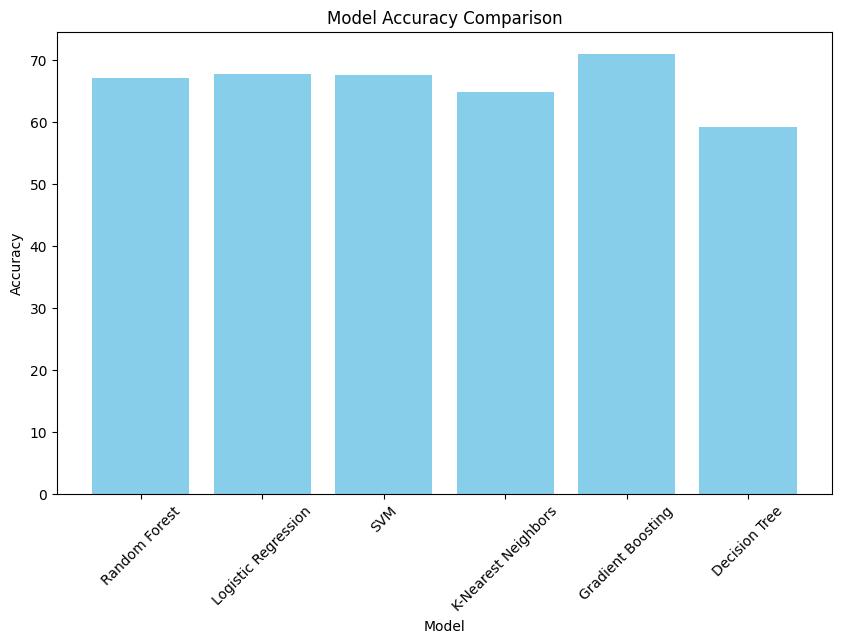

In [49]:
# Simulated accuracies for different models for demonstration purposes
model_accuracies = {
    'Random Forest': 67.12,
    'Logistic Regression': 67.80,
    'SVM': 67.68,
    'K-Nearest Neighbors': 64.86,
    'Gradient Boosting': 71.07,
    'Decision Tree': 59.21
}

# Bar chart to compare model accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

In [55]:
 # optimize the hyperparameters of the GradientBoostingClassifier

#Import Libraries

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
gb = GradientBoostingClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5) # Added GridSearchCV
grid_search

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'subsample': [0.8]})

In [56]:
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Fit the GridSearchCV object to the data (replace X_train and y_train with your data)
grid_search.fit(X_train, y_train) # Added the fit method

# Get the best model from grid search
best_gb_model = grid_search.best_estimator_ # Added best_gb_model

# Save the model to a file
joblib.dump(best_gb_model, 'best_gradient_boosting_model.pkl')

['best_gradient_boosting_model.pkl']

In [ ]:
from google.colab import files

files.download('best_gradient_boosting_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>